<a href="https://colab.research.google.com/github/LearningBoy2002/Sentiment-Analysis/blob/main/DS2EDAandPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [3]:
file_path = "youtube_comments_cleaned.csv"
data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,  # Load as Pandas DataFrame
    "amaanpoonawala/youtube-comments-sentiment-dataset",  # Kaggle dataset name
    file_path,
)
data.sample(5)

<ipython-input-3-524d345abf14>:2: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  data = kagglehub.load_dataset(


100%|██████████| 283M/283M [00:05<00:00, 55.4MB/s]


,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID
213568,UgyuG3YS5DHkP6T0cth4AaABAg,gDhldXoVvlU,Ukraine war update: How is Russia doing & what...,@luispuente2181,UCFckLeNR2QgfpxBqBUc_C1w,LET UKRAINIANS LIVE!!!!!! 🙏,Positive,49,9,2022-04-23 16:28:01,DE,25
231761,UgyORKFTm49ERqTccgp4AaABAg,vVYOHmqQDCU,Objects in depth in javascript in hindi | chai...,@abhishekgosavi3391,UC56QwyvA0OxC372O9vjAWOA,// ***************************** Merge two arr...,Neutral,0,0,2024-09-06 04:58:13,IN,27
315793,UgwZjXoqhkAKd48ohCV4AaABAg,Rwud_h6dZg4,Dr. House’s teaching style is amazing #movie #...,@DayLight-r1i,UCwmEsykmkPGkwvomlG1oG6g,What's the name of the movie,Neutral,0,2,2025-01-14 12:00:35,IE,24
579904,UgzfrpqTZvNk-eBMlUN4AaABAg,ibA-8gwpR-A,Tony contemplates about becoming old 😨,@VeryStableGenius,UCwr4jCA_H9YgeTvqFqKWvuQ,"""Jesus ain't got nothing to do with it"" is suc...",Positive,25,1,2025-01-10 18:57:28,IE,24
964484,UgxDuMGFSA24sXdj1mR4AaABAg,ztsUnTVHYmk,Spider-Man Escaping Hunters,@nguyenhuy-qp4vt,UCJBjP7BIpGjuYxdYgdiiZ1g,“he like in a roblox pakor”💀,Neutral,1,0,2025-01-12 12:11:14,AU,24


In [4]:
df = data[['CommentText', 'Sentiment']]
sentiment_mapping = {"Positive": 1, "Negative": -1, "Neutral": 0}
df["Sentiment"] = df["Sentiment"].replace(sentiment_mapping)
df = df.rename(columns={"CommentText": "clean_comment", "Sentiment": "category"})

<ipython-input-4-1a8657985056>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sentiment"] = df["Sentiment"].replace(sentiment_mapping)
<ipython-input-4-1a8657985056>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment"] = df["Sentiment"].replace(sentiment_mapping)


In [5]:
df.sample(5)

,clean_comment,category
881485,this is a legendary channel many web developer...,1
75760,Thanks sir you explained it very nicely I lear...,1
819138,Russian armed forces go after defenseless civi...,-1
426488,I’m very impressed. People should know her nam...,1
378126,Congratulations. ! Your both lefties 🎉,0


In [6]:
df.shape

(1032225, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032225 entries, 0 to 1032224
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   clean_comment  1032225 non-null  object
 1   category       1032225 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ MB


In [8]:
df.isnull().sum()

,0
clean_comment,0
category,0


In [9]:
df.duplicated().sum()

40484

In [10]:
df[df.duplicated()]

,clean_comment,category
601,Nice,1
662,awesome,1
1645,thanks,1
1796,❤,1
1797,❤,1
...,...,...
1032115,Thanks!,1
1032137,Masha Allah ❤,1
1032174,✅,1
1032176,What the f***,-1


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
4604,,0


In [13]:
df = df[df['clean_comment'].str.strip() != ''] #removing rows that are just spaces

In [14]:
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,anyone know what movie this is?,0
1,the fact they're holding each other back while...,1
2,waiting next video will be?,0
3,thanks for the great video.\n\ni don't underst...,0
4,good person helping good people.\nthis is how ...,1


In [15]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
1054,ayo 1:02,0
2266,"""one of the most difficult places to reach wi...",-1
4000,finally 4k video,0
4087,i genuinely feel sorry for george,-1
5175,china has entered the comment section,0
...,...,...
1013012,that was an incredible comeback. that was a gr...,1
1016686,the dye got to his pea brain.,-1
1018739,they used frog dna to fill in the missing gaps...,0
1021856,"""on the planet...maaaarrsss"" 😂😂",0


In [16]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

0

In [17]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()


,clean_comment,category
1360,https://www.youtube.com/watch?v=agtcdcgmnga li...,0
2619,https://panacea99.com/blogs/news/9-shocking-th...,0
4027,faustina kowalska and more: https...,0
8084,https://youtu.be/nfngc_8rivc ukraine crisis no...,0
8479,https://youtu.be/iz13vfxezlk,0


In [18]:
df = df[~df['clean_comment'].str.contains(url_pattern, regex=True)]

In [19]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()

,clean_comment,category
3,thanks for the great video.\n\ni don't underst...,0
4,good person helping good people.\nthis is how ...,1
14,yeah i just found out he’s the best pick becau...,0
39,tiktok was a school for all they choosen to wa...,1
46,joe: bring stacy on\nstaffers: why?\njoe: just...,0


In [20]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

<Axes: xlabel='category', ylabel='count'>

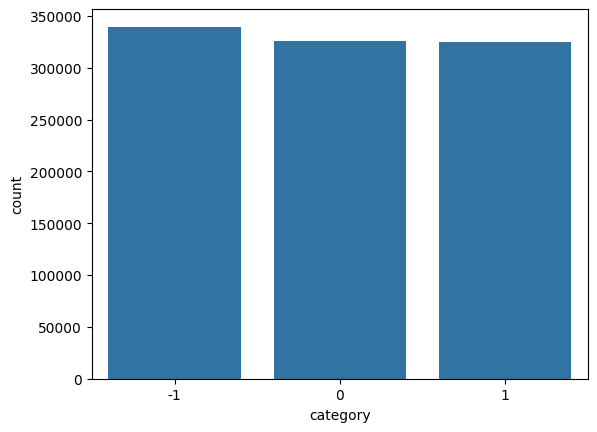

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="category")

Almost all the three category has the same distribution

In [22]:
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
-1,34.29
0,32.92
1,32.79


In [23]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [24]:
df['word_count'].describe()

,word_count
count,990344.000000
mean,19.801611
std,29.878389
min,1.000000
25%,7.000000
50%,12.000000
75%,23.000000
max,1796.000000


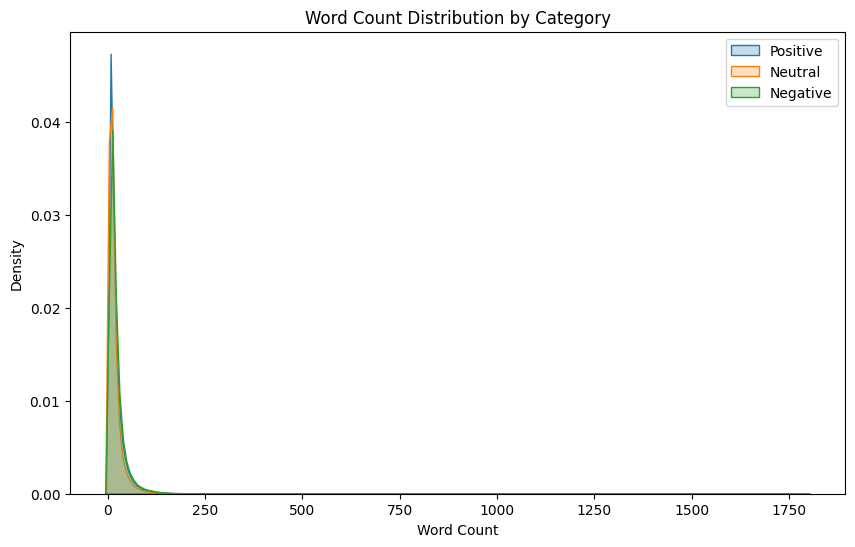

In [25]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Almost Same Distribution for all the 3 categories

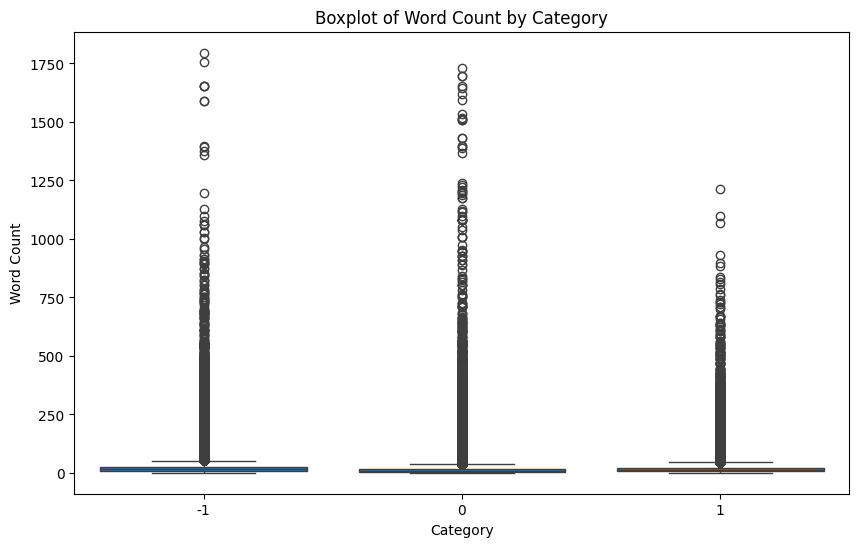

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

In [27]:
!pip install nltk


In [28]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
#df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

def number_of_stop_words(text):
  words = text.split()
  count =0
  for word in words:
    if word in stop_words:
      count+=1
  return count

df['num_stop_words'] = df['clean_comment'].apply(number_of_stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


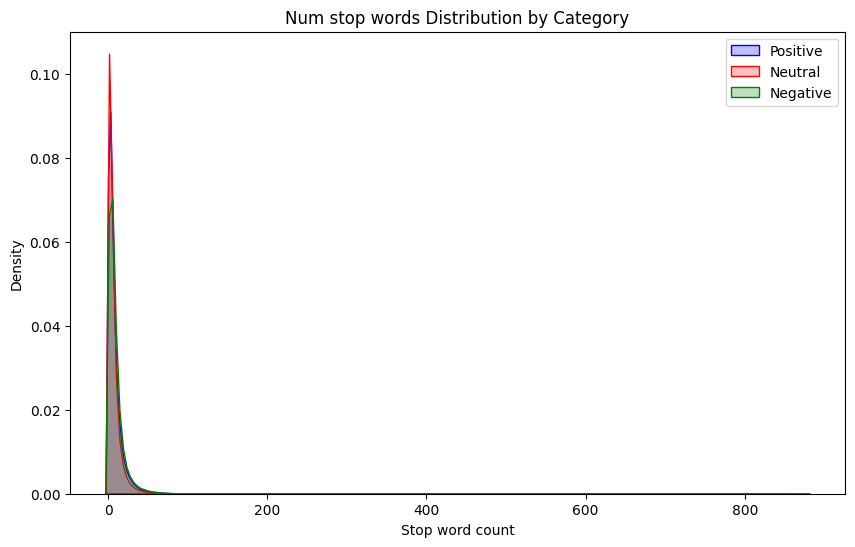

In [29]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True, color = 'blue')

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True, color='red')

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True, color= 'green')

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<ipython-input-30-24de6c77347d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


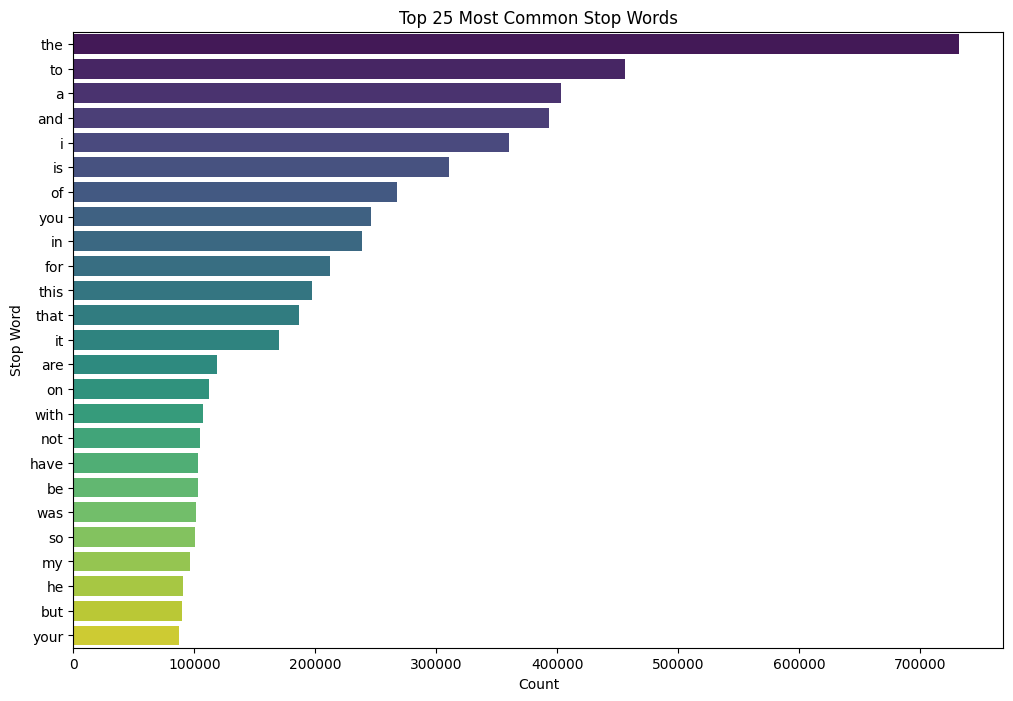

In [30]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



In [31]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,anyone know what movie this is?,0,6,2,31
1,the fact they're holding each other back while...,1,13,7,79
2,waiting next video will be?,0,5,1,27
3,thanks for the great video. i don't understan...,0,91,46,488
4,good person helping good people. this is how i...,1,19,10,94


In [32]:
df['num_chars'].describe()


,num_chars
count,990344.000000
mean,110.362907
std,177.144531
min,1.000000
25%,36.000000
50%,67.000000
75%,124.000000
max,9997.000000


In [33]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [34]:
char_frequency_df['character'].values


array([' ', 'e', 't', ..., '𓁹', '𓆉', '螢'], dtype=object)

In [35]:
char_frequency_df.tail(50)


,character,frequency
7080,汀,1
7078,謡,1
5337,績,1
7072,账,1
7071,赔,1
7070,凭,1
7069,炬,1
7068,渎,1
7067,𝐼,1
5353,蓑,1


In [36]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
187816,"truly a strong and incredible queen, monarch, ...",1,41,23,216,7
17319,“bro was trying so hard to hold back his laugh...,0,13,6,67,6
688335,😅😅😅😅😅😅😅😅😅😅,0,1,0,10,0
548190,i just want to put it out there that today i w...,1,28,14,141,3
528030,"here,at 2:45pm in ne tn, it's already crazy, w...",0,20,7,119,7


In [37]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,990344.000000
mean,3.596861
std,13.821118
min,0.000000
25%,0.000000
50%,2.000000
75%,4.000000
max,9855.000000


In [38]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [39]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
5,,20347272
4,e,9653137
9,t,7434947
0,a,6935870
3,o,6492616
12,i,6299832
1,n,5755065
13,s,5456526
17,r,4711587
8,h,4102664


In [40]:
df.head()


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,anyone know what movie this is?,0,6,2,31,1
1,the fact theyre holding each other back while ...,1,13,7,79,1
2,waiting next video will be?,0,5,1,27,1
3,thanks for the great video. i dont understand...,0,91,46,488,9
4,good person helping good people. this is how i...,1,19,10,94,2


In [41]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)




In [42]:
df.head()


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,anyone know movie is?,0,6,2,31,1
1,fact theyre holding back equally aggressive,1,13,7,79,1
2,waiting next video be?,0,5,1,27,1
3,thanks great video. dont understand db continu...,0,91,46,488,9
4,good person helping good people. america excep...,1,19,10,94,2


In [43]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,anyone know movie is?,0,6,2,31,1
1,fact theyre holding back equally aggressive,1,13,7,79,1
2,waiting next video be?,0,5,1,27,1
3,thanks great video. dont understand db continu...,0,91,46,488,9
4,good person helping good people. america excep...,1,19,10,94,2


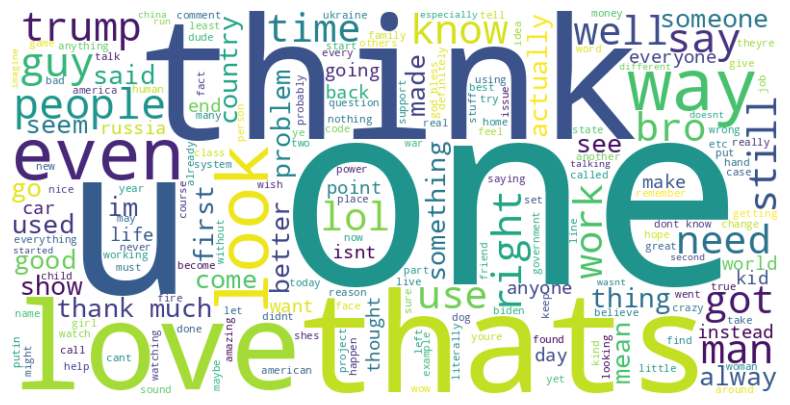

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])